Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


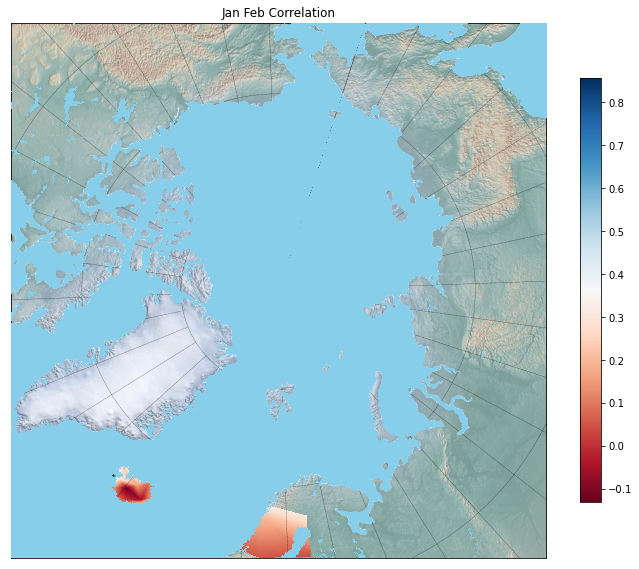

In [34]:
import numpy as np
from scipy.interpolate import griddata
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd
from numpy import linspace
from numpy import meshgrid
geo_df=pd.read_csv('Iceland.csv')

#Define mapframe
lllon = 14
lllat = 63
urlon = 25
urlat = 67

# Make some toy data, random points + corners
n = 18 # no of stations
lat = np.array(geo_df.iloc[:14,2])
lat = np.append(lat, [lllat, urlat, urlat, lllat]) 
lon = np.array(geo_df.iloc[:14,3])
lon = np.append(lon, [lllon, urlon, lllon, urlon])
data = np.array(geo_df.iloc[:18,6])
# set up basemap chose projection!
m = Basemap(projection='npstere',boundinglat=63,lon_0=18,resolution='l')

# transform coordinates to map projection m
m_lon, m_lat = m(*(lon, lat))

# generate grid data
numcols, numrows = 240, 240
xi = np.linspace(m_lon.min(), m_lon.max(), numcols)
yi = np.linspace(m_lat.min(), m_lat.max(), numrows)
xi, yi = np.meshgrid(xi, yi)

# x = linspace(0, map.urcrnrx)
# y = linspace(0, map.urcrnry)

# xi, yi = meshgrid(x, y)

# interpolate, there are better methods, especially if you have many datapoints
zi = griddata((m_lon,m_lat),data,(xi,yi),method='linear')

fig, ax = plt.subplots(figsize=(12, 12))

# draw map details
m.shadedrelief()
# m.drawmapboundary(fill_color = 'lightgreen', zorder = 1)

# Plot interpolated temperatures
m.contourf(xi, yi, zi, 500, cmap='RdBu', zorder = 2)

m.drawlsmask(ocean_color='skyblue', land_color=(0, 0, 0, 0), lakes=True, zorder = 3)

m.drawparallels(np.arange(-80.,81.,10.),  linewidth=0.4)
m.drawmeridians(np.arange(-180.,181.,10.),  linewidth=0.4)

plt.colorbar(shrink=0.65)
plt.title('Jan Feb Correlation')

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


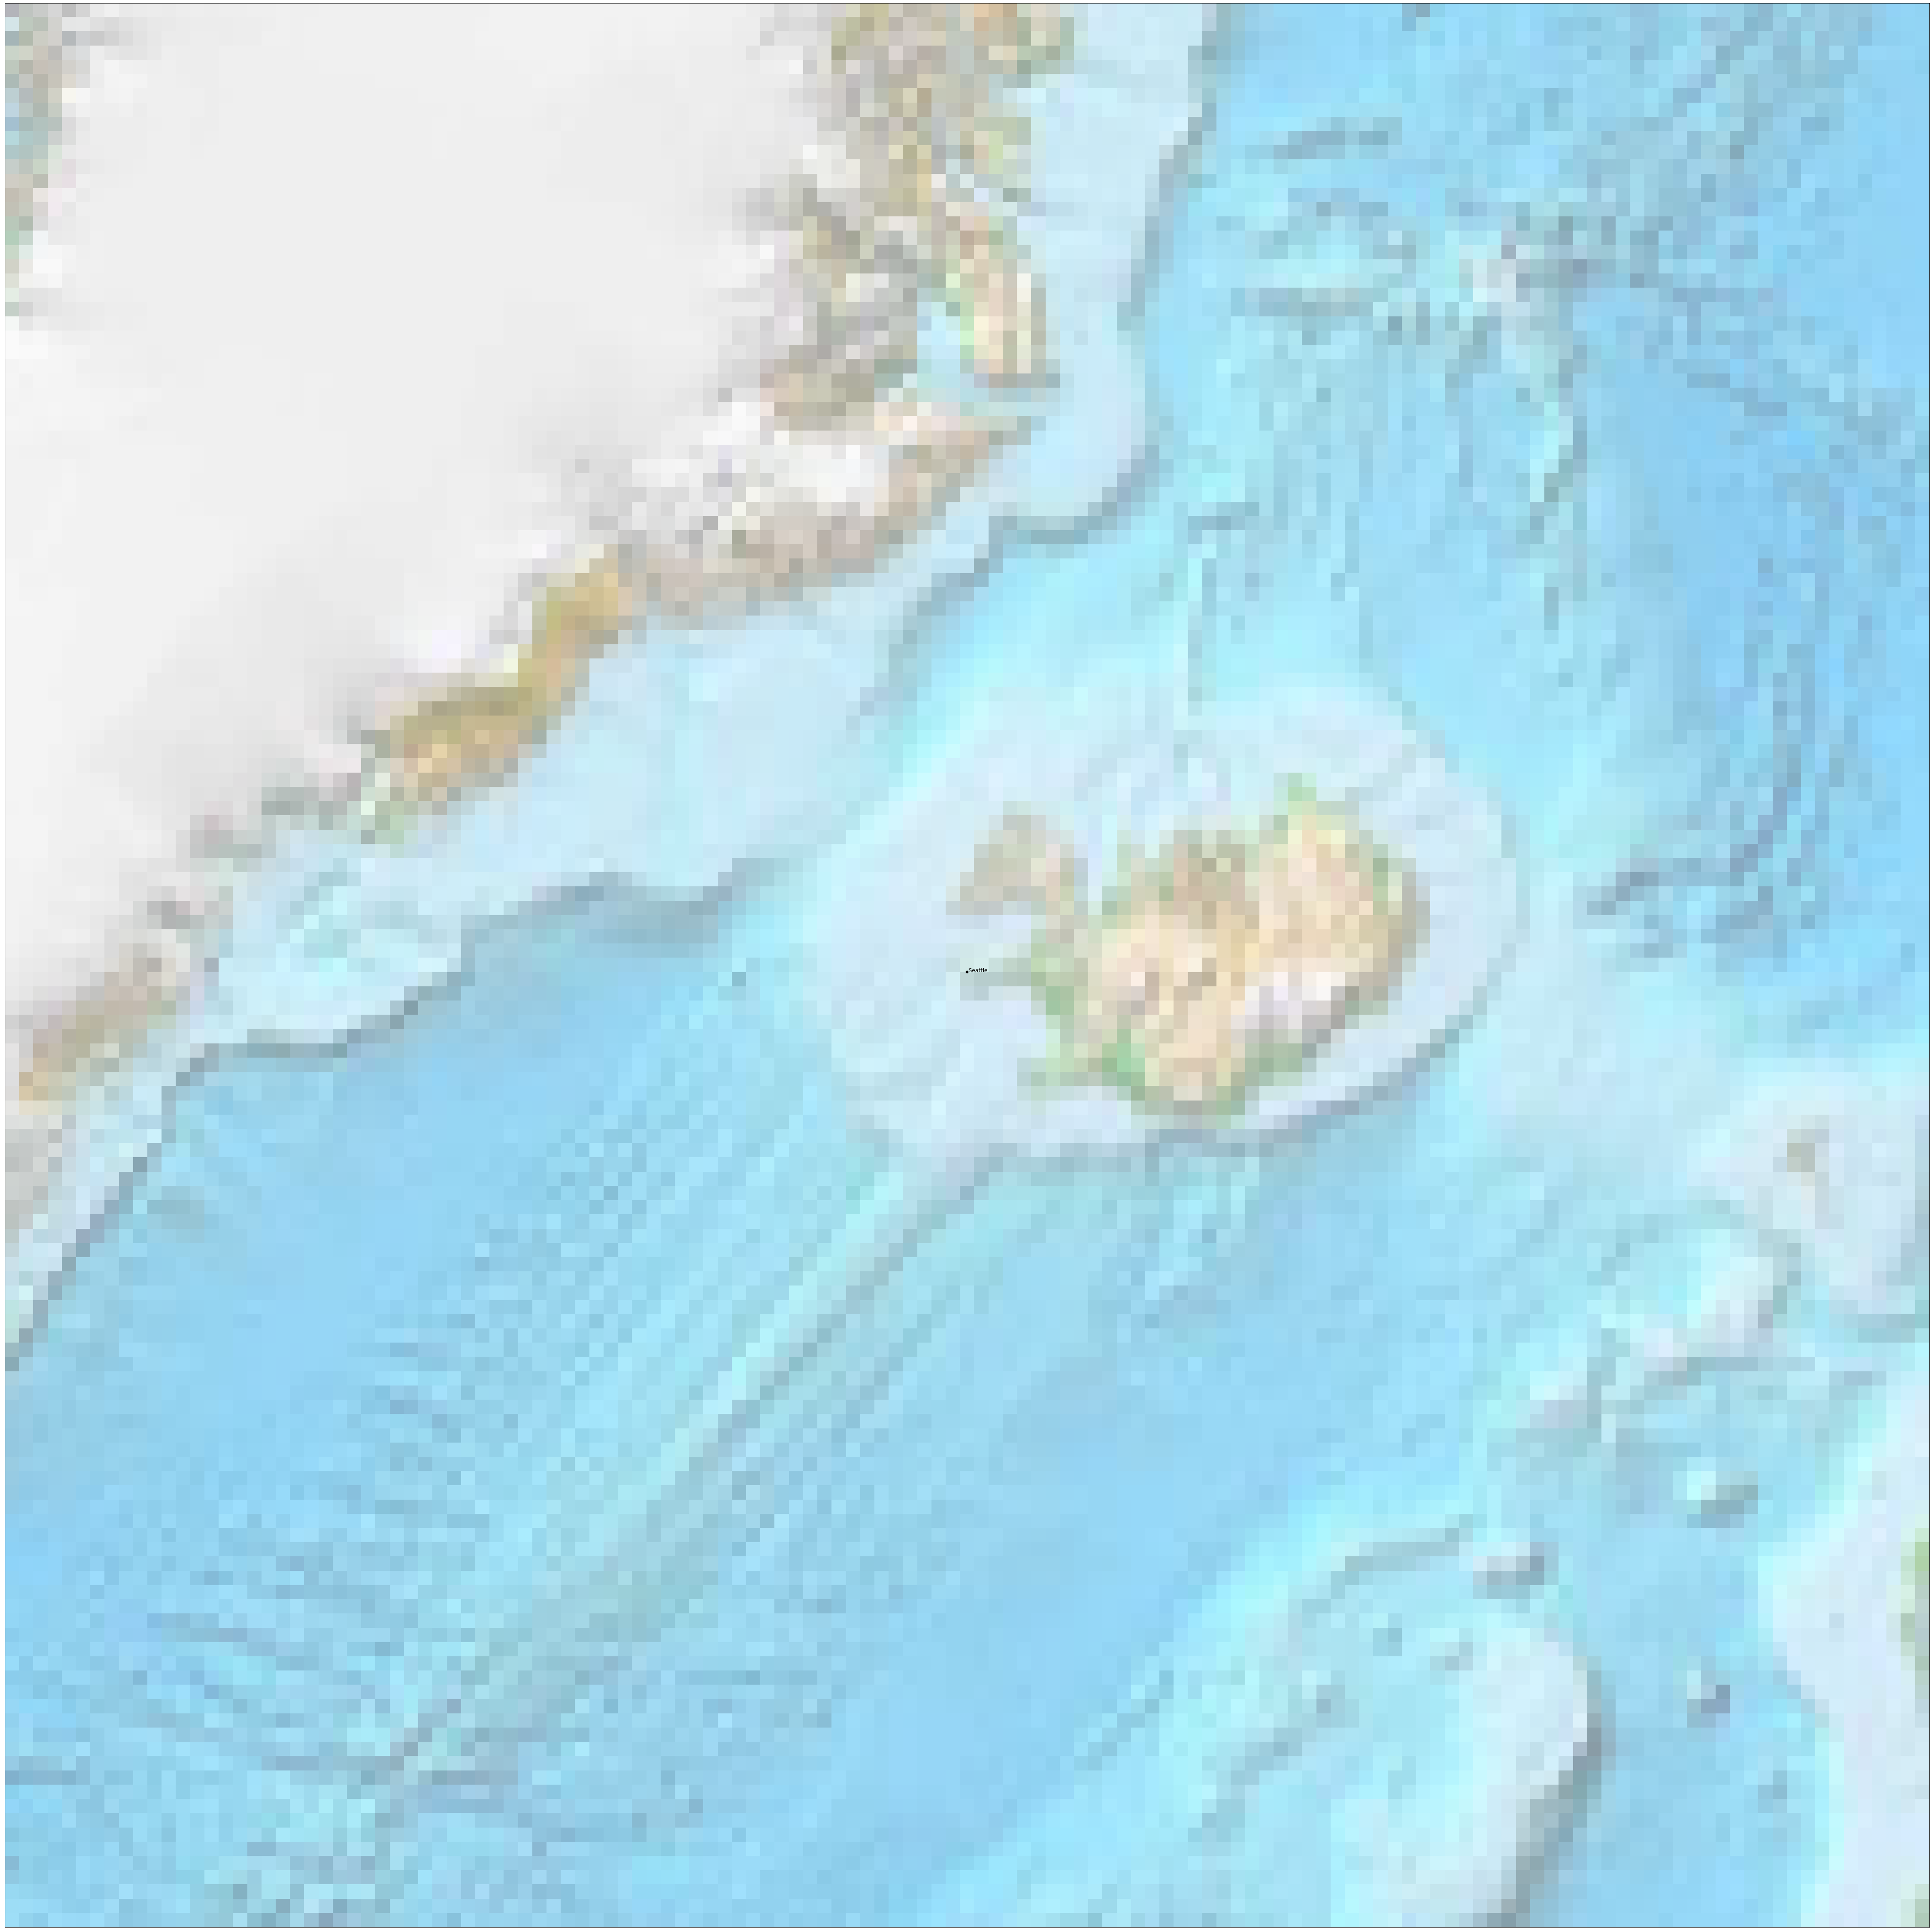

In [72]:
fig = plt.figure(figsize=(80, 80))
m = Basemap(projection='lcc', resolution=None,
            width=2E6, height=2E6, 
            lat_0=64.9631, lon_0=-23.933)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(-23.933, 64.9)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Seattle', fontsize=12);